# Introduction

Chaque partie de la feuille nécessite que chaque parties du code soient exécutées au fur et à mesure. Il suffit pour cela de sélectionner le code et appuyer sur ▶. Des parties sont à compléter. Elles sont indiquées par la mention `"A COMPLETER"`.

      t        x        y
0   0.6 -0.17195  0.07290
1   0.8 -0.18621  0.01902
2   1.0 -0.18146 -0.03645
3   1.2 -0.16402 -0.08716
4   1.4 -0.13074 -0.12995
5   1.6 -0.08637 -0.16165
6   1.8 -0.03566 -0.17909
7   2.0  0.01664 -0.18067
8   2.2  0.06735 -0.16640
9   2.4  0.11173 -0.13946
10  2.6  0.14659 -0.09984
11  2.8  0.16878 -0.05230
12  3.0  0.17670 -0.00158
13  3.2  0.17036  0.05071
14  3.4  0.14976  0.09984
15  3.6  0.11648  0.13788
16  3.8  0.07528  0.16640
17  4.0  0.02773  0.18225


<function matplotlib.pyplot.show(close=None, block=None)>

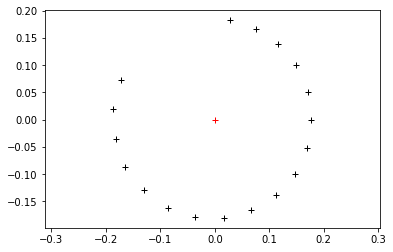

In [1]:
"""
Programme permettant d'observer les vecteurs vitesses et accélérations.
Les données des positions sont issus d'un pointage vidéo.
Rien est à modifier dans cette partie. Il s'agit des différentes parties
nécessaires au bon fonctionnement du programme.
"""

# imports nécessaires
import matplotlib.pyplot as plt
import pandas as pd

# lecture des données dans le fichier parabolique.txt
# création d'un tableau de ces valeurs
tableau = pd.read_csv(
    "./circulaire.txt",
    sep=";",  # indique que les valeurs sont séparées par des ;
    decimal=",",  # indique que les décimales sont indiquées par ,
    skiprows=[
        0,
        2,
    ],  # enlève la 1ère ligne et la 3ème (ce sont le titre du fichier et les unités)
    header=0, # la 1ère ligne sera le nom des colonnes
    index_col=False,
)

# Afficher le tableau pour observer ces valeurs
print(tableau)

# pour plus de simplicité on enregistre les données dans des variables explicites
temps = tableau["t"]
pos_x = tableau["x"]
pos_y = tableau["y"]

# repère orthonormé
plt.axis('equal')
plt.plot(0,0,'r+')
# Affichage des points
plt.plot(pos_x, pos_y, "k+")
plt.show

# Vitesses
## Calcul de la vitesse en un point

Pour calculer la vitesse moyenne en un point, il faut utiliser la méthode des points adjacents, c'est-à-dire utiliser les positions du point ainsi que celle du point suivant. Afin d'accéder à une valeur dans les listes `temps`, `pos_x` et `pos_y`, on la recherche par son index.

Ex: la position x du 10ème point, c'est-à-dire le point 9, est `pos_x[9]`. Attention l'index commence à 0 ! La 10ème valeur est donc celle à l'index 9.
Pour enregistrer cette valeur dans une variable, exemple `pos_x_9`, on peut écrire `pos_x_9 = pos_x[9]`

1 - Ecrire un programme permettant d'enregistrer dans les variables `vx_2`, `vy_2` et `v_2` les valeurs de respectivement les coordonnées vx et vy du vecteur vitesse moyenne du point 2, et la norme de la vitesse moyenne du point 2.

In [2]:
# vx au point 2
vx_2 = (pos_x[3] - pos_x[2]) / (temps[3] - temps[2])
# vy au point 2
vy_2 = (pos_y[3] - pos_y[2]) / (temps[3] - temps[2])
# v au point 2
v_2 = (vx_2 ** 2 + vy_2 ** 2) ** 0.5 # norme du vecteur de coordonnées vx_2 et vy_2

In [3]:
# tester votre programme en affichant les vitesses
print("Au point 2 :")
print(f"vx = {vx_2} m/s")
print(f"vy = {vy_2} m/s")
print(f"v = {v_2} m/s")

Au point 2 :
vx = 0.08720000000000007 m/s
vy = -0.25355000000000005 m/s
v = 0.2681257960361144 m/s


## Calcul de la vitesse pour tous les points

Avec la méthode des points adjacents, si l’on dispose de n points, on peut calculer des coordonnées et normes des vitesses pour n-1 points (exclusion du dernier point car il n'y aura pas de points suivant).

Les calculs systématiques pour ces n-1 points mobilisent une boucle. On peut utiliser une boucle `for`

In [4]:
# exemple de boucle for
liste1 = [1,2,3,4,5] # liste de départ
liste2 = [] # on initialise une nouvelle liste de valeur que l'on va compléter
for i in range(0, len(liste1)):
    # la valeur i va prendre tour à tour chaque valeur entière dans l'intervalle [0; len(liste1)[
    # len(liste1) est égal au nombre d'élément dans la liste1, càd 5
    # les valeurs de i vont donc être tour à tour 0, 1, 2, 3, 4
    valeur = liste1[i] + 1 # on peut utiliser cette valeur de i. Ici elle utilisée pour aller chercher la valeur à lindex i dans la liste1 à laquelle on ajoute 1
    liste2.append(valeur) # ici on ajoute cette nouvelle valeur à la liste2 avec la méthode append()

# afficher le résultat pour comprendre le fonctionnement
print(f"la nouvelle liste appelée liste2 contient les valeur de la liste1 + 1 : {liste2}")

la nouvelle liste appelée liste2 contient les valeur de la liste1 + 1 : [2, 3, 4, 5, 6]


2 - Compléter le code suivant permettant de compléter la liste des vitesses `vit` correspondant à toutes les vitesses du point 0 au point n-1.

In [5]:
vit_x = []
vit_y = []
vit = []
for i in range(0, 17):
    # calcul de vx d'index i
    vx_i = (pos_x[i+1] - pos_x[i]) / (temps[i+1] - temps[i])
    vit_x.append(vx_i) # ajout à la liste
    # calcul de vy au d'index i
    vy_i = (pos_y[i+1] - pos_y[i]) / (temps[i+1] - temps[i])
    vit_y.append(vy_i) # ajout à la liste
    # calcul de v au d'index i
    v_i = (vx_i ** 2 + vy_i ** 2) ** 0.5
    vit.append(v_i) # ajout à la liste

# Affichage de la liste des vitesses pour contrôler
print(vit)

[0.2786755281685135, 0.27836502115028755, 0.2681257960361144, 0.27104162503202356, 0.2726530258405357, 0.26812579603611447, 0.26161930356913654, 0.2633978454733445, 0.2595837051896751, 0.2638637906193267, 0.26231887560753264, 0.25667317740659984, 0.2633647518177022, 0.26636989788637944, 0.2527152547829274, 0.25054093477912975, 0.25061050456834383]


<function matplotlib.pyplot.show(close=None, block=None)>

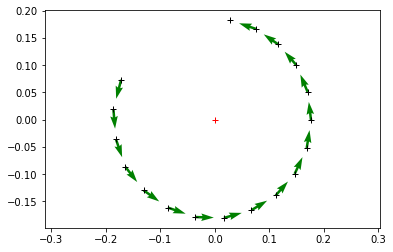

In [6]:
"""
A exécuter pour observer les vecteurs vitesses.
Rien est à modifier
"""

# repère orthonormé
plt.axis('equal')
plt.plot(0,0,'r+')
# Affichage des points
plt.plot(pos_x, pos_y, "k+")
# affichage des vecteurs vitesses
plt.quiver(pos_x[:-1], pos_y[:-1], vit_x, vit_y, color="green")
plt.show

# Accélération
## Calcul de l'accélération pour tous les points

Avec la méthode des points adjacents, si l’on dispose de n points, on peut calculer des coordonnées et normes des vitesses pour n-2 points (exclusion des deux derniers points).

In [7]:
acc_x = []
acc_y = []
acc = []
for i in range(0, 16):
    # calcul de vx au point i
    ax_i = (vit_x[i+1] - vit_x[i]) / (temps[i+1] - temps[i])
    acc_x.append(ax_i) # ajout à la liste
    # calcul de vy au point i
    ay_i = (vit_y[i+1] - vit_y[i]) / (temps[i+1] - temps[i])
    acc_y.append(ay_i) # ajout à la liste
    # calcul de v au point i
    a_i = (ax_i ** 2 + ay_i ** 2) ** 0.5
    acc.append(a_i) # ajout à la liste

<function matplotlib.pyplot.show(close=None, block=None)>

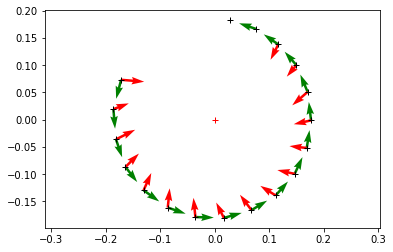

In [8]:
"""
A exécuter pour observer les vecteurs vitesses.
Rien est à modifier
"""

# repère orthonormé
plt.axis('equal')
plt.plot(0,0,'r+')
# Affichage des points
plt.plot(pos_x, pos_y, "k+")
# affichage des vecteurs vitesses
plt.quiver(pos_x[:-1], pos_y[:-1], vit_x, vit_y, color="green")
# affichage des vecteurs vitesses
plt.quiver(pos_x[0:-2], pos_y[0:-2], acc_x, acc_y, color="red")
plt.show